In [121]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as ss
import seaborn as sns

df = pd.read_csv('dubai_properties.csv')

In [122]:
df

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,07/03/2024,45,Al Reem Island,Abu Dhabi,24.4935984,54.40784051
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,08/03/2024,44,Yas Island,Abu Dhabi,24.4940223,54.6073721
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,21/03/2024,31,Al Raha Beach,Abu Dhabi,24.48593095,54.60093933
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,24/02/2024,57,Al Reem Island,Abu Dhabi,24.4935984,54.40784051
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,16/02/2024,65,Yas Island,Abu Dhabi,24.4940223,54.6073721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73736,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,14/12/2023,129,Al Salamah,Umm Al Quwain,25.4934115,55.5759942
73737,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,14/12/2023,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.6065272
73738,"King Faisal Street, Umm Al Quwain",50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,02/01/2024,110,King Faisal Street,Umm Al Quwain,*,*
73739,"Al Maqtaa, Umm Al Quwain",37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,23/10/2023,181,Al Maqtaa,Umm Al Quwain,*,*


In [123]:
df.describe()


,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days
count,7.374100e+04,73741.000000,73741.000000,73741.000000,73741.000000,73741.000000
mean,1.471812e+05,2.162691,2.650222,2052.324229,88.053192,74.262256
std,2.311419e+05,1.577830,1.633006,2967.005348,66.523317,72.347001
min,0.000000e+00,0.000000,1.000000,74.000000,0.000000,11.000000
25%,5.499900e+04,1.000000,2.000000,850.000000,39.977778,30.000000
50%,9.800000e+04,2.000000,2.000000,1334.000000,71.428571,52.000000
75%,1.700000e+05,3.000000,3.000000,2130.000000,118.483412,95.000000
max,1.600000e+07,12.000000,11.000000,210254.000000,2182.044888,2276.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73741 entries, 0 to 73740
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73741 non-null  object 
 1   Rent                    73741 non-null  int64  
 2   Beds                    73741 non-null  int64  
 3   Baths                   73741 non-null  int64  
 4   Type                    73741 non-null  object 
 5   Area_in_sqft            73741 non-null  int64  
 6   Rent_per_sqft           73741 non-null  float64
 7   Rent_category           73741 non-null  object 
 8   Frequency               73741 non-null  object 
 9   Furnishing              73741 non-null  object 
 10  Purpose                 73741 non-null  object 
 11  Posted_date             73741 non-null  object 
 12  Age_of_listing_in_days  73741 non-null  int64  
 13  Location                73741 non-null  object 
 14  City                    73741 non-null

In [125]:
# a) Is the study an example of experimental design, observational study or mixed?
# The study is an example of observational study. The researcher is not actively changing or affecting the factors. Instead, the researcher can only observe and gather data.

# Randomly sample 5000 entries from the data set (without replacement) and use the resulting data set to answer parts (b-i).

sampled_data = df.sample(5000)

sampled_data.head()


,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
33774,"Palazzo Versace, Culture Village, Dubai",850000,4,2,Apartment,6444,131.905649,High,Yearly,Furnished,For Rent,12/09/2023,222,Culture Village,Dubai,25.22633235,55.33809781
37863,"Aykon City Tower C, Aykon City, Business Bay, ...",140000,2,2,Apartment,813,172.201722,Medium,Yearly,Unfurnished,For Rent,04/04/2024,17,Business Bay,Dubai,25.18942655,55.26481902
22755,"Sun Tower, Shams Gate District, Shams Abu Dhab...",120000,2,3,Apartment,1500,80.000000,Medium,Yearly,Unfurnished,For Rent,06/01/2024,106,Al Reem Island,Abu Dhabi,24.4935984,54.40784051
65051,"Oasis Villas, Barashi, Sharjah",130000,5,7,Villa,11000,11.818182,Medium,Yearly,Unfurnished,For Rent,14/03/2024,38,Barashi,Sharjah,25.286124,55.582916
36745,"Dukes The Palm, Palm Jumeirah, Dubai",105000,0,2,Apartment,344,305.232558,Medium,Yearly,Furnished,For Rent,08/10/2023,196,Palm Jumeirah,Dubai,25.10019025,55.118535


In [126]:
# b) Construct the frequency table of the “Furnishing” column and use the table to answer the following questions:
#     i. Calculate the percentage of “furnished” properties.
#     ii. Suppose you survey 50 renting properties across major cities in the UAE, what is the probability that 35 of them are furnished?

# Find the frequency of values in the "Furnishing" column
furnishing_frequency = sampled_data['Furnishing'].value_counts()

# If you want to get the relative frequency (percentage), use the normalize parameter
furnishing_percentage = sampled_data['Furnishing'].value_counts(normalize=True) * 100

# Display the results
print("Frequency Counts:\n", furnishing_frequency)
print("\nPercentage Distribution:\n", furnishing_percentage)

Frequency Counts:
 Unfurnished    3939
Furnished      1061
Name: Furnishing, dtype: int64

Percentage Distribution:
 Unfurnished    78.78
Furnished      21.22
Name: Furnishing, dtype: float64


In [127]:
# Probability of 35 out of 50 properties being furnished
n = 50
x = 35
p_furnished = furnishing_percentage['Furnished'] / 100
furnished_probability = ss.binom.pmf(x, n, p_furnished)
print("Furnished Probability:", furnished_probability)


Furnished Probability: 1.7166056787054992e-13


In [128]:
# c) Construct a frequency table of the “Rent_category” columns and use the results to answer the following questions:
#     i. Calculate the percentages of the three values “High”, “Medium” and “Low”.
#     ii. Suppose you survey 50 properties across major cities in the UAE, what is the probability 15 are Low rent, 10 are Medium rent and the rest are of High rent?

# Find the frequency of values in the "Rent_category" column
rent_category_frequency = sampled_data['Rent_category'].value_counts()

# If you want to get the relative frequency (percentage), use the normalize parameter
rent_category_percentage = sampled_data['Rent_category'].value_counts(normalize=True) * 100

# Display the results
print("Rent Category Counts:\n", rent_category_frequency)
print("\nPercentage Distribution:\n", rent_category_percentage)


Rent Category Counts:
 Medium    1779
Low       1626
High      1595
Name: Rent_category, dtype: int64

Percentage Distribution:
 Medium    35.58
Low       32.52
High      31.90
Name: Rent_category, dtype: float64


In [129]:

# Probability of 15 Low, 10 Medium, 25 High rent properties
n = 50
x_low, x_medium, x_high = 15, 10, 25
p_low = rent_category_percentage['Low'] / 100
p_medium = rent_category_percentage['Medium'] / 100
p_high = rent_category_percentage['High'] / 100

rent_probability = ss.multinomial.pmf([x_low, x_medium, x_high],n,p=[p_low,p_medium,p_high])
print("Rent Probability:",rent_probability)

Rent Probability: 0.00025424423694195655


In [130]:
# d) Suppose the average number of bedrooms for the rental properties in Dubai is 2. Suppose you survey some rental properties in Dubai, what is the probability that you find at most 1 of them with 2 bedrooms.

dubai_data = sampled_data[sampled_data['City'] == 'Dubai']
p_bedrooms_2 = dubai_data["Beds"].value_counts()[2]/dubai_data["Beds"].value_counts().sum()
n_dubai=10 #surveying 10 properties lets say
prob_at_most_1 = ss.binom.cdf(1, n_dubai, p_bedrooms_2)
print("Probability of at most 1 with 2 bedrooms:", prob_at_most_1)


Probability of at most 1 with 2 bedrooms: 0.23399359386993066


<Figure size 720x432 with 0 Axes>

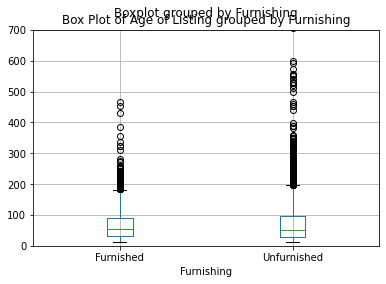

In [131]:
# e) Construct box plot chart of “Age_of_listing_in_days” by the variable “Furnishing”. Discuss the patterns you see in the plots and compare the central values, variability and skewness across the two Furnishing categories
plt.figure(figsize=(10, 6))
sampled_data.boxplot(column='Age_of_listing_in_days', by='Furnishing')
plt.title('Box Plot of Age of Listing grouped by Furnishing')
plt.ylim(0, 700)
plt.show()
# Central values for both furnsihed and unfurnished are almost same, unfurnished also clearly has a lot more variability,
#both are right skewed, unfurnished has a lot more outliers in the high range. The boxplot indicates that
# several outlier unfurnished apartments have a very high age of listing, so unfurnished apartments are more likely to be left unrented

In [132]:
# f) Give the summary statistics of the “Age_of_listing_in_days” by the variable “Furnishing”?
#      i. Compare the mean values of the age of listing for furnished and unfurnished properties. Which type of properties has longer listing.
#      ii. Calculate the coefficient of variation of the age of listing for the two furnishing categories and discuss the results.
#      iii. Construct the 95% confidence interval for the ratio of variances of the age of listing for furnished and unfurnished properties. What do you conclude?
#      iv. Based on the result in part iii., construct the 95% confidence interval for the difference in the mean age of listing of the two groups of properties ( 1 2   − ). Based on the interval, can you conclude that mean age of listing is significantly different for the two groups? Explain how it is different.

summary_stats = sampled_data.groupby('Furnishing')['Age_of_listing_in_days'].describe()
summary_stats



,count,mean,std,min,25%,50%,75%,max
Furnishing,,,,,,,,
Furnished,1061.0,72.263902,60.388117,12.0,31.0,54.0,91.0,465.0
Unfurnished,3939.0,76.261234,75.721369,12.0,30.0,52.0,97.0,1246.0


In [133]:
mean_furnished = summary_stats.loc['Furnished', 'mean']
mean_unfurnished = summary_stats.loc['Unfurnished', 'mean']
std_furnished = summary_stats.loc['Furnished', 'std']
std_unfurnished = summary_stats.loc['Unfurnished', 'std']
n_furnished = summary_stats.loc['Furnished', 'count']
n_unfurnished = summary_stats.loc['Unfurnished', 'count']

In [134]:
print ("Furnished mean is: ", mean_furnished, "Unfurnished mean is: ",mean_unfurnished)
#Clerly the unfurnished mean age listing is higher.

Furnished mean is:  72.26390197926484 Unfurnished mean is:  76.26123381568927


In [135]:
# Coefficient of Variation
cv_furnished = std_furnished / mean_furnished
cv_unfurnished = std_unfurnished / mean_unfurnished
print("CV Furnished:", cv_furnished,"CV Unfurnished:",cv_unfurnished)

#Unfurnished properties have a more variable age of listing

CV Furnished: 0.8356608897701077 CV Unfurnished: 0.9929208550853138


In [136]:

# 95% CI for ratio of variances
f_statistic = (std_unfurnished ** 2) / (std_furnished ** 2)
dof_num = n_unfurnished - 1
dof_den = n_furnished - 1
alpha = 0.05
f_critical_low = ss.f.ppf(alpha / 2, dof_num, dof_den)
f_critical_high = ss.f.ppf(1 - alpha / 2, dof_num, dof_den)
ci_var_low = f_statistic / f_critical_high
ci_var_high = f_statistic / f_critical_low
print("95% CI for Ratio of Variances",ci_var_low,", ",ci_var_high)
# Since 1 is not in the interval, we conclude the variances of furnished and unfurnished apartments are not equal 


95% CI for Ratio of Variances 1.4265241735387044 ,  1.7283114996850966


In [157]:
# 95% CI for difference in means large samples since variances are not equal
mean_diff = mean_unfurnished - mean_furnished

t=ss.t.ppf(1-alpha/2,n_furnished+n_unfurnished-2)
margin=t*((std_furnished ** 2/n_furnished)+(std_unfurnished**2/n_unfurnished))**(1/2)

ci_diff_low = mean_diff - margin
ci_diff_high = mean_diff + margin
print("95% CI for Difference in Means:",ci_diff_low,", ", ci_diff_high)
#The difference in means has 0, therefore we conclude that the means for furnished and unfurnished are the same, no significant difference

95% CI for Difference in Means: -0.33904767291933346 ,  8.333711345768178


((array([-3.63568806, -3.40036853, -3.27067228, ...,  3.27067228,
          3.40036853,  3.63568806]),
  array([      0,   10000,   11000, ..., 2950000, 4000000, 4750000],
        dtype=int64)),
 (135329.60148020549, 143657.0206, 0.6632065674338472))

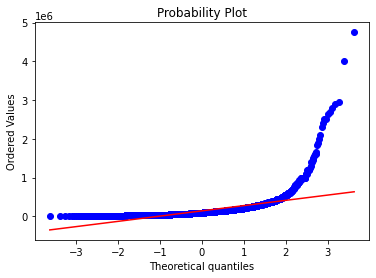

In [139]:
dfs=sampled_data #alias used by second group member
ss.probplot(dfs["Rent"],dist="norm",plot=plt)
#QQ plot with normal distribution, the points clearly dont follow the normal line, so distributon of rent is not normal

<AxesSubplot:>

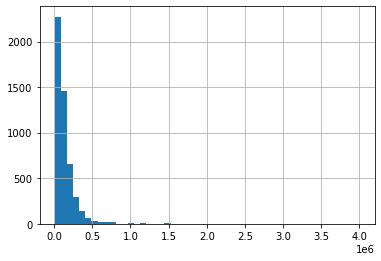

In [19]:
dfs["Rent"].hist(bins=50) #verified not normal

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days
Rent,1.000000,0.438986,0.107856,0.545668,0.406951,0.019600
Beds,0.438986,1.000000,0.749492,0.740505,-0.189455,0.058163
Baths,0.107856,0.749492,1.000000,0.575178,-0.261092,0.064046
Area_in_sqft,0.545668,0.740505,0.575178,1.000000,-0.206348,0.026520
Rent_per_sqft,0.406951,-0.189455,-0.261092,-0.206348,1.000000,-0.037896
Age_of_listing_in_days,0.019600,0.058163,0.064046,0.026520,-0.037896,1.000000


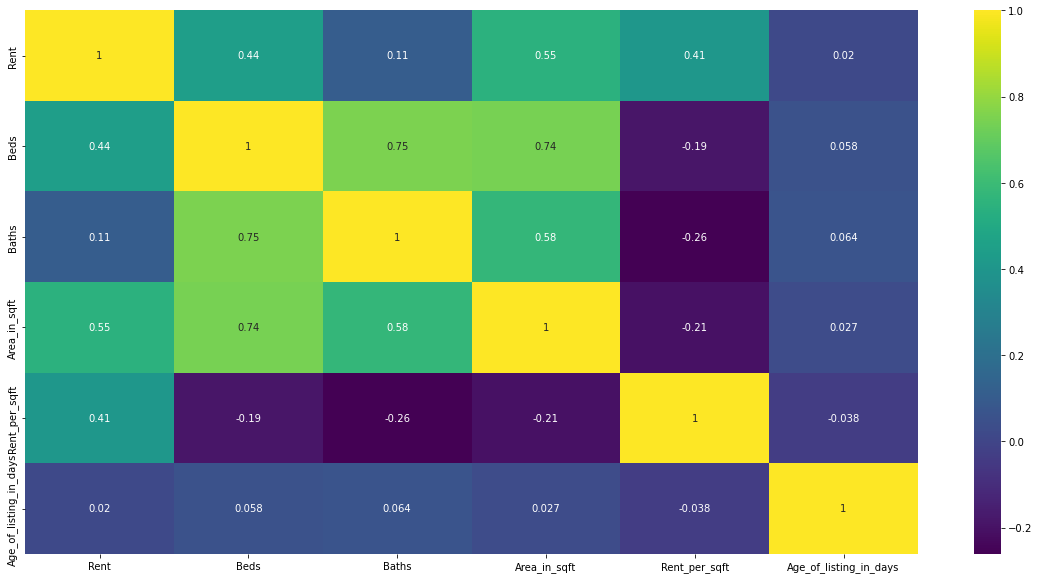

In [140]:
plt.figure(figsize=(20,10))
cr=dfs.corr()
sns.heatmap(cr,cmap="viridis",annot=True)
cr
#Baths and beds are most correlated
#Age of listing and rent are least correlated

In [151]:
dfs["count"]=1
rc=dfs.pivot_table(index="Rent_category",columns="City",values="count",aggfunc="count",fill_value=0,margins=True)
arr=[]
for x in rc:
    if x=="All":
        break
    for i in range(0,len(rc)-1):
        arr.append(((rc[x].iloc[i]-(rc[x]["All"]*rc["All"].iloc[i])/rc["All"]["All"])**2)/((rc[x]["All"]*rc["All"].iloc[i])/rc["All"]["All"]))
chi=np.sum(arr)
print ("Chi squared calculated =", chi)

Chi squared calculated = 1492.088967213206


In [152]:
#H0 : rent category and city are independent variables
#Ha: rent category and city are not independent
#calculated chi squared = 1492
#threshold chi squared from table with alpha=0.05 and df=(3-1)(8-1)=14 is 23.68,
#since 1492>23, we reject H0 and conclude the variables are not independent of each other. 


In [153]:
dfs["count"]=1
rc=dfs.pivot_table(index="Rent_category",columns="Furnishing",values="count",aggfunc="count",fill_value=0,margins=True)
arr=[]
for x in rc:
    if x=="All":
        break
    for i in range(0,len(rc)-1):
        arr.append(((rc[x].iloc[i]-(rc[x]["All"]*rc["All"].iloc[i])/rc["All"]["All"])**2)/((rc[x]["All"]*rc["All"].iloc[i])/rc["All"]["All"]))
chi2=np.sum(arr)
print ("Chi squared calculated =", chi2)

Chi squared calculated = 193.39673468611662


In [154]:
#H0 : Furnishing and rent category are independent variables
#Ha: Furnishing and rent category are not independent
#calculated chi squared = 193.4
#threshold chi squared from table with alpha=0.05 and df=(3-1)(3-1)=4 is 9.48,
#since 193.4>9.48, we reject H0 and conclude the variables are not independent of each other. 


In [158]:
dfs["Type"],_=pd.factorize(dfs["Type"])
dfs["Rent_category"],_=pd.factorize(dfs["Rent_category"])
training_data=dfs.sample(frac=0.7,random_state=2)
testing_data=dfs.drop(training_data.index)

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
train_x=training_data[["Rent","Beds","Baths","Type","Area_in_sqft","Rent_category","Age_of_listing_in_days"]]
train_y=training_data["Furnishing"]
model=gnb.fit(train_x,train_y)


In [159]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sb
test_x=testing_data[["Rent","Beds","Baths","Type","Area_in_sqft","Rent_category","Age_of_listing_in_days"]]
test_y=testing_data["Furnishing"]
pred_y=model.predict(test_x)
accuracy=accuracy_score(test_y,pred_y)
misclassificationRate=1-accuracy
print("Misclassification Rate:",misclassificationRate*100,"%")
confusion_matrix(test_y, pred_y)
#The vast majority of apartments are not furnished and classified correctly as shown in the confusion matrix,
#this imbalance of classes in the data makes the model biased towards predicting not furnished,
# and this is the cause of the majority(313) of misclassifications where the model predicts unfurnished
#when the apartment is actually furnished. This is the major cause that reduces the accuracy of the model

Misclassification Rate: 21.866666666666667 %


array([[  13,  313],
       [  15, 1159]], dtype=int64)

In [160]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

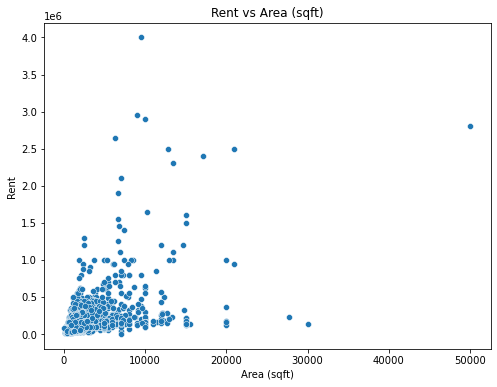

In [237]:
#o) Assuming "area_in_sqft" is the independent variable (X) and "rent" is the dependent variabl
X_train = training_data['Area_in_sqft']
Y_train = training_data['Rent']
X_test = testing_data['Area_in_sqft']
Y_test= testing_data['Rent']
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train, y=Y_train)
plt.title("Rent vs Area (sqft)")
plt.xlabel("Area (sqft)")
plt.ylabel("Rent")
plt.show()

In [163]:
#There appears to be a weak positive relationship betwen rent prices and area in sqft.
#We can see that higher rent values are loosly associated with larger areas, 
#but the relationship does not appear to be linear or particularly strong.
#There might be a confounding factor differentiating 2 lines with different slopes. 
#There are many outliers, across a wide range.

In [251]:
# p) Simple linear regression
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), Y_train.values)
Y_pred_train = model.predict(X_train.values.reshape(-1,1))
rss=((Y_pred_train-Y_train)**2).sum()
rss
#rss of about 10^14

106395895812874.81

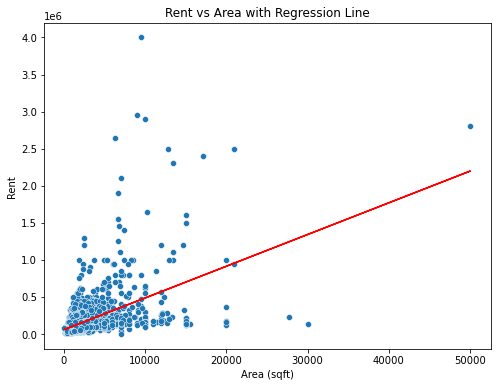

In [165]:
# Plot regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train.values, y=Y_train)
plt.plot(X_train, Y_pred_train, color='red')
plt.title("Rent vs Area with Regression Line")
plt.xlabel("Area (sqft)")
plt.ylabel("Rent")
plt.show()

In [166]:
r_sq = model.score(X_train.values.reshape(-1,1), Y_train)
correlation = np.sqrt(r_sq) * np.sign(model.coef_[0])
print("R-squared: ",r_sq)
print("Correlation coefficient: ",correlation)

R-squared:  0.2644166581921016
Correlation coefficient:  0.5142146032466421


In [167]:
#R-squared tells us how much of the variation in the Y-variable results from variation in the X-variable. 
#The data above has a relatively low R-squared value of 0.236, which means that only 23.6% of change in rent prices 
#is a result of changes in area. The correlation coefficent of 0.486 shows us that there is a weak positive
#correlation between the two variables.

In [168]:
# Correlation significance test
n = len(Y_train)
t_stat = correlation * np.sqrt((n - 2) / (1 - correlation**2))
p_value = 2 * (1 - ss.t.cdf(abs(t_stat), df=n-2))
print(t_stat," is calculated and this is greater than the table value of 1.96 at alpha=0.05 and df=4998")
print("p-value for correlation significance: ",p_value)

35.459970165359785  is calculated and this is greater than the table value of 1.96 at alpha=0.05 and df=4998
p-value for correlation significance:  0.0


In [170]:
#The test results in a final p-value of ~0 for the significance of the correlation coefficient. 
#This confirms that the coefficient is in fact significant

In [171]:
#lack of fit on minitab, we imported the data there

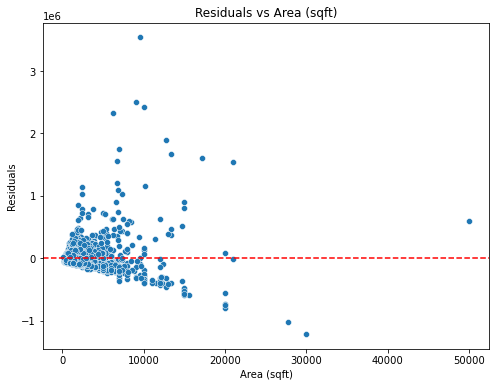

In [172]:
# s) Residual Analysis and Diagnostics
residuals = Y_train - Y_pred_train

#  Residuals vs Predictor (X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train.to_numpy().flatten(), y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Area (sqft)")
plt.xlabel("Area (sqft)")
plt.ylabel("Residuals")
plt.show()



In [173]:
#Test for Linear relationship: This scatter plot visualizes the relationship between the independent variable X (Area) and the residuals. 
#For a linear relationship, there should be no systematic pattern in the residuals across the range of X.
#We can see that this is clearly not the case, as the residuals seem to increase with x
#around the zero line.

#Test for Constant Residual Variance:

#Once again we can see that the grpah is skewed and data is not normally distributed about the zero line, 
#this indicates that yet another assumption is violated. 

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


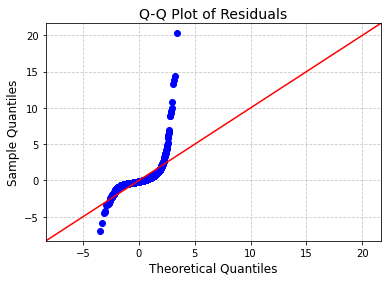

In [174]:
# Create the QQ plot for normality check
fig = sm.qqplot(residuals, line='45', fit=True)

plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.title("Q-Q Plot of Residuals", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  

In [175]:
#The Q-Q plot shows that the residuals deviate significantly from the red diagonal line, 
#especially in the tails. This indicates that the residuals are not normally distributed,
#with potential outliers in the upper range. We can amend this by applying a log tranformation later on.

In [181]:
# Check residual mean (should be close to 0)
mean_residuals = np.mean(residuals)
print("Mean of residuals: ", mean_residuals)

Mean of residuals:  1.7670182777302604e-11


In [182]:
#The residual mean is very small and close to zero! For a good regression model, 
#the residuals should have an average (mean) close to zero.
#This shows that model predictions, on average, are accurate.


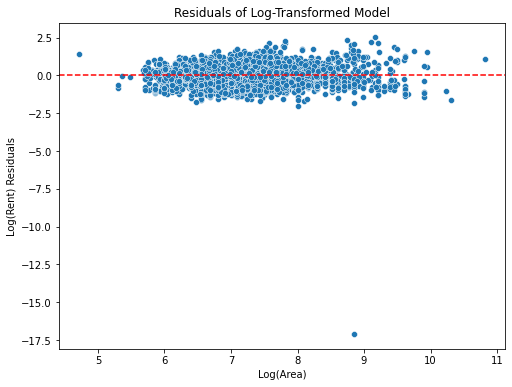

In [231]:
# t) Remedies: Apply Log Transformation if needed
X_log = np.log(X_train.values.reshape(-1, 1)) # Reshape X_log to a 2D array
Y_log = np.log(Y_train.values.reshape(-1, 1)+.01) # Reshape Y_log to a 2D array, add .01 to avoid invalid logs when y is 0


# Refit the linear model with log transformation
reg_log = LinearRegression()
reg_log.fit(X_log, Y_log)
Y_log_pred = reg_log.predict(X_log)

# Residuals for log model
residuals_log = Y_log - Y_log_pred

# Plot Residuals of log-transformed model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_log.flatten(), y=residuals_log.flatten()) # Flatten residuals_log for plotting
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals of Log-Transformed Model")
plt.xlabel("Log(Area)")
plt.ylabel("Log(Rent) Residuals")
plt.show()

# We used minitab for predicitons with improved equation to get PI and CI

In [257]:
#After applying a log transformation, the data looks a lot healthier. 
#It is more normally distributed and roughly equally distributed above and below the zero line, 
#suggesting that it confirms with model assumptions.

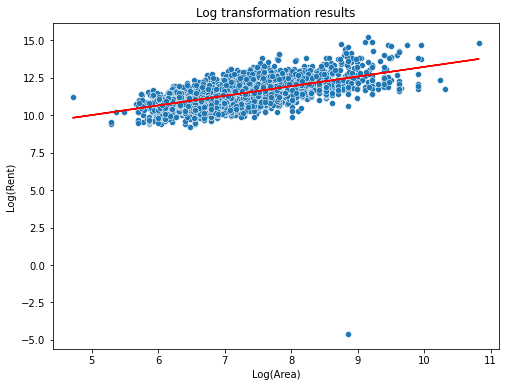

In [261]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_log.flatten(), y=Y_log.flatten()) 
plt.plot(X_log.flatten(), Y_log_pred, color='red')
plt.title("Log transformation results")
plt.xlabel("Log(Area)")
plt.ylabel("Log(Rent) ")
plt.show()
#As can be seen below, results of linear regression have greatly improved

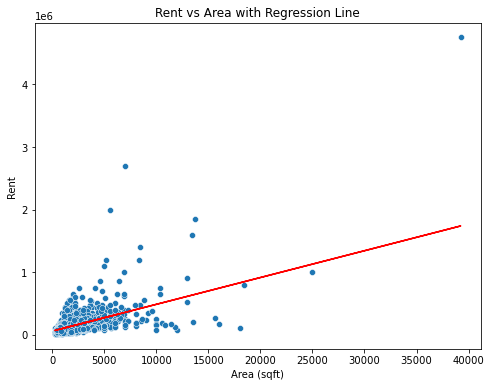

40018440088418.12

In [252]:
#v) Use the regression equation in part p) to predict the Y for the values of X
#in the testing dataset. Calculate the sum of squared prediction error (SSE) and compare it the
#SSE obtained in the model fit in part p)?Y_pred_test = model.predict(X_test.values.reshape(-1,1))

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.values, y=Y_test)
plt.plot(X_test, Y_pred_test, color='red')
plt.title("Rent vs Area with Regression Line")
plt.xlabel("Area (sqft)")
plt.ylabel("Rent")
plt.show()
#b) Results
rss=((Y_pred_test-Y_test)**2).sum()
rss
#rss is 4x10^13 in comparison to 10^14 in part p and this makes sense as testing values are fewer in number


In [253]:
X_center=X_train-X_train.mean()#centralizing x and y

In [254]:
Y_center=Y_train-Y_train.mean()

In [255]:
df=pd.concat([X_center,Y_center], axis=1) #making excel file to export to minitab with new centralized values

In [256]:
df.to_excel("centralized.xlsx")